### Module 6 
# Clustering for Diversification analysis

Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features.

In financial Markets, Cluster analysis is a technique used to group sets of objects that share similar characteristics. It is common in statistics, but investors will use the approach to build a diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those slightly less correlated in another, and so on, until each stock is placed into a category.



## Problem Statements

### 6.1 Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import glob
import random

In [2]:
def read_csv(filename):
    return pd.read_csv(filename, parse_dates=['Date'])['Close Price']

In [3]:
csv_files = glob.glob('..\datasets\Large_Cap\*.csv')
filenames = csv_files[:10] #random.sample(csv_files, 10)
csv_files = glob.glob('..\datasets\Small_Cap\*.csv')
filenames += csv_files[:10] #random.sample(csv_files, 10)
csv_files = glob.glob('..\datasets\Mid_Cap\*.csv')
filenames += csv_files[:10] #random.sample(csv_files, 10)

len(filenames)

30

In [4]:
filenames

['..\\datasets\\Large_Cap\\ADANIPORTS.csv',
 '..\\datasets\\Large_Cap\\ASIANPAINT.csv',
 '..\\datasets\\Large_Cap\\AXISBANK.csv',
 '..\\datasets\\Large_Cap\\BAJFINANCE.csv',
 '..\\datasets\\Large_Cap\\BPCL.csv',
 '..\\datasets\\Large_Cap\\CIPLA.csv',
 '..\\datasets\\Large_Cap\\DRREDDY.csv',
 '..\\datasets\\Large_Cap\\EICHERMOT.csv',
 '..\\datasets\\Large_Cap\\GAIL.csv',
 '..\\datasets\\Large_Cap\\HDFC.csv',
 '..\\datasets\\Small_Cap\\ASHOKA.csv',
 '..\\datasets\\Small_Cap\\BAJAJELEC.csv',
 '..\\datasets\\Small_Cap\\BOMDYEING.csv',
 '..\\datasets\\Small_Cap\\CENTURYPLY.csv',
 '..\\datasets\\Small_Cap\\FORTIS.csv',
 '..\\datasets\\Small_Cap\\GUJALKALI.csv',
 '..\\datasets\\Small_Cap\\IDFC.csv',
 '..\\datasets\\Small_Cap\\ITDC.csv',
 '..\\datasets\\Small_Cap\\JETAIRWAYS.csv',
 '..\\datasets\\Small_Cap\\JKLAKSHMI.csv',
 '..\\datasets\\Mid_Cap\\ADANIPOWER.csv',
 '..\\datasets\\Mid_Cap\\AJANTPHARM.csv',
 '..\\datasets\\Mid_Cap\\AMARAJABAT.csv',
 '..\\datasets\\Mid_Cap\\APOLLOTYRE.csv',
 '..\

In [5]:
df = pd.DataFrame()
for fname in filenames:
    df[fname.split('\\')[-1][:-4]] = read_csv(fname)
print("Dataframe with the Closing Prices of 30 different stocks")

df.head()

Dataframe with the Closing Prices of 30 different stocks


,ADANIPORTS,ASIANPAINT,AXISBANK,BAJFINANCE,BPCL,CIPLA,DRREDDY,EICHERMOT,GAIL,HDFC,...,ADANIPOWER,AJANTPHARM,AMARAJABAT,APOLLOTYRE,BERGEPAINT,CASTROLIND,CUMMINSIND,DHFL,EXIDEIND,GMRINFRA
0,356.20,1148.05,500.1,1332.95,727.85,569.00,2675.80,28930.60,414.00,1559.50,...,30.25,1633.50,933.40,231.90,259.5,449.85,1066.05,431.4,245.80,17.55
1,354.50,1142.85,501.5,1347.75,733.30,565.60,2724.10,29362.50,411.40,205.00,...,32.85,1634.25,924.70,234.40,261.5,443.00,1047.75,1009.9,244.70,17.40
2,348.55,1154.95,502.8,1324.80,727.45,562.35,2736.90,29093.55,408.30,1566.55,...,33.10,1654.35,937.70,237.35,260.9,439.55,1016.45,1055.2,243.20,17.30
3,347.90,1151.35,492.0,1314.55,714.90,560.10,2678.95,28357.30,404.75,1552.50,...,31.90,1633.40,912.10,232.65,254.1,433.95,1054.45,1070.0,239.85,16.75
4,349.45,1123.15,501.7,1289.15,702.45,564.95,2656.45,27936.05,401.05,207.00,...,32.40,1670.25,895.75,234.65,247.8,437.10,972.95,1050.0,238.15,16.95


In [6]:
print('df.shape:', df.shape)
df.dropna(inplace=True)
print('df.shape after df.dropna(): ', df.shape)

df.shape: (495, 30)
df.shape after df.dropna():  (494, 30)


In [7]:
df.isnull().sum()

ADANIPORTS    0
ASIANPAINT    0
AXISBANK      0
BAJFINANCE    0
BPCL          0
CIPLA         0
DRREDDY       0
EICHERMOT     0
GAIL          0
HDFC          0
ASHOKA        0
BAJAJELEC     0
BOMDYEING     0
CENTURYPLY    0
FORTIS        0
GUJALKALI     0
IDFC          0
ITDC          0
JETAIRWAYS    0
JKLAKSHMI     0
ADANIPOWER    0
AJANTPHARM    0
AMARAJABAT    0
APOLLOTYRE    0
BERGEPAINT    0
CASTROLIND    0
CUMMINSIND    0
DHFL          0
EXIDEIND      0
GMRINFRA      0
dtype: int64

### 6.2 Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [8]:
working_days_per_year = 252
df_summary = pd.DataFrame()
df_summary['returns'] = df.pct_change().mean() * working_days_per_year
df_summary['volatility'] = df.pct_change().std() * np.sqrt(working_days_per_year)
df_summary

,returns,volatility
ADANIPORTS,0.071200,0.309379
ASIANPAINT,0.101249,0.209406
AXISBANK,0.235246,0.277896
BAJFINANCE,0.452758,0.321060
BPCL,-0.250364,0.436175
CIPLA,0.021976,0.254183
DRREDDY,0.085396,0.297678
EICHERMOT,-0.136246,0.294935
GAIL,-0.052551,0.338425
HDFC,455.057496,43.120575


### 6.3 Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

In [9]:
from sklearn.cluster import KMeans

elbow_curve = [KMeans(n_clusters=n, random_state=0).fit(df_summary).inertia_ for n in range(1,10)]

Text(0, 0.5, 'inertia')

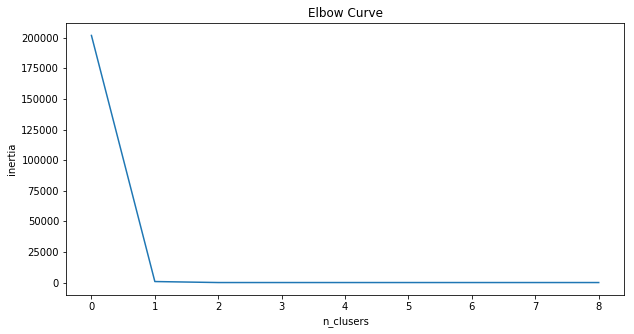

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(elbow_curve)
ax.set_title('Elbow Curve')    
ax.set_xlabel('n_clusers')
ax.set_ylabel('inertia')

In [11]:
print("So the optimum number of clusters is using Elbow method is 1")

So the optimum number of clusters is using Elbow method is 1


In [12]:
from matplotlib import cm

cmap = cm.get_cmap('Set1') # Colour map (there are many others)
def get_color(n, max=6):
    if isinstance(n, list): 
        return [ get_color(i, max) for i in n ]
    else:
        return cmap(0. + n/max)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196D6E6E208>


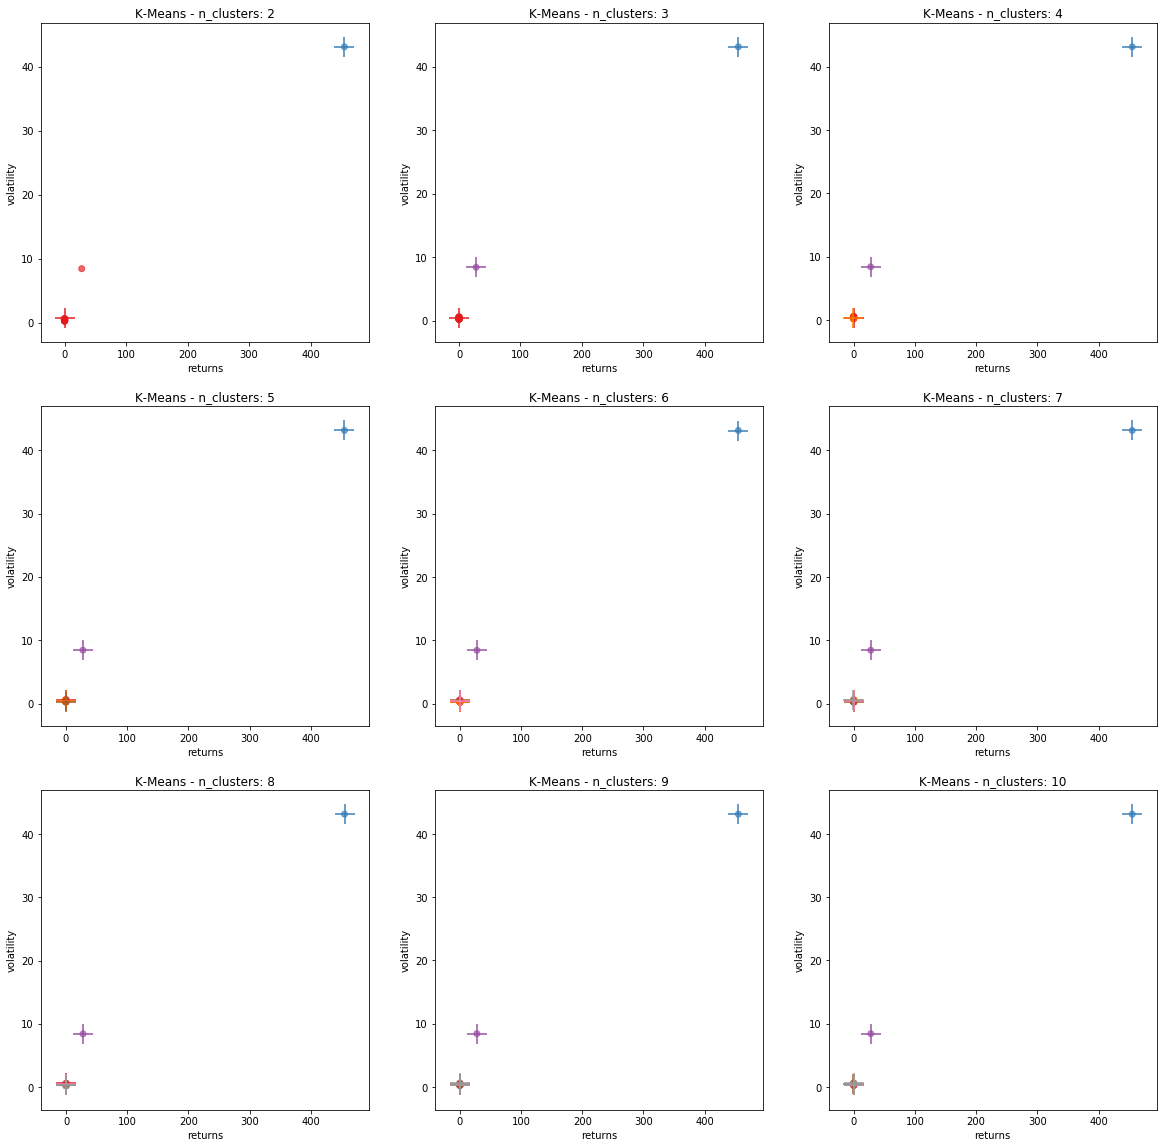

In [13]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

print(ax)
df_kmeans = {}
for x in range(0,len(ax)):
    for y in range(0,len(ax[0])):
        n = 2 + (len(ax[0]) * x) + y
        df_kmeans[n] = KMeans(n_clusters=n, random_state=0).fit(df_summary)
        df_kmeans_predict = df_kmeans[n].predict(df_summary)

        ax[x][y].scatter(df_summary.returns, df_summary.volatility, c=get_color(df_kmeans_predict), alpha=0.66 )
        ax[x][y].set_title('K-Means - n_clusters: ' + str(n))
        ax[x][y].set_xlabel('returns')
        ax[x][y].set_ylabel('volatility')
        
        # Mark Cluster Centers
        for i, coords in enumerate(df_kmeans[n].cluster_centers_ ):
            ax[x][y].scatter(coords[0], coords[1], s=400, marker='+', c=[get_color(i)])
        
        # Add thick borders to n_clusters selected by elbow_curve
        if n in [1]:
            for spine in ax[x][y].spines.values(): spine.set_linewidth(3)

### 6.4 Prepare a separate Data frame to show which stocks belong to the same cluster

In [14]:
df_summary['cluster_'+str(1)] = df_kmeans[n].predict(df_summary[['returns', 'volatility']] )
df_summary

,returns,volatility,cluster_1
ADANIPORTS,0.071200,0.309379,8
ASIANPAINT,0.101249,0.209406,8
AXISBANK,0.235246,0.277896,8
BAJFINANCE,0.452758,0.321060,3
BPCL,-0.250364,0.436175,9
CIPLA,0.021976,0.254183,8
DRREDDY,0.085396,0.297678,8
EICHERMOT,-0.136246,0.294935,5
GAIL,-0.052551,0.338425,0
HDFC,455.057496,43.120575,1
